In [1]:
# Importing necessary libraries and dataframes
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Importing data
df_population = pd.read_excel("owid-covid-data.xlsx")
df_mask = pd.read_csv("yougov-chart.csv")
df_work = pd.read_csv("yougov-chart (1).csv")
df_distance = pd.read_csv("yougov-chart (2).csv")
df_temperature = pd.read_csv("matYearCountry.csv")
df_humidity = pd.read_csv("UNdata_Export_20201129_092519940.csv")
df_elevation = pd.read_csv("elevation-table-1.csv")

In [3]:
# Cleaning df_population

# Keep only the columns that are needed
df_population = df_population[['location','date','total_cases','new_cases','population','population_density','median_age']]

# Keep only the rows where there is a number of total cases - otherwise that row is not useful
df_population = df_population[df_population['total_cases'].notna()]

# Drop rows with location as "International or "World"
df_population = df_population[(df_population['location'] != 'International') & (df_population['location'] != 'World')]

# Change the object type of df_population['date'] to datetime
df_population['date'] = pd.to_datetime(df_population['date'])

In [4]:
# Manipulating Dataframe and find cases per capita three months after initial case

#   Create new dataframe of the first case of each country (df_population_first_case)
df_population_first_case = df_population[(df_population['total_cases'] == df_population['new_cases']) & (df_population['total_cases'] != 0)].copy()

#   Create new dataframe of the first date three months after the first case since not every country records cases daily (df_population_three_months)
df_population_first_case['date'] = pd.to_datetime(df_population_first_case['date']) # Convert date from object into datetime variable
df_population_first_case['three_months'] = df_population_first_case['date'] + pd.offsets.MonthOffset(3) # New column 'three_months' is equal to three months after 'date'
three_months_dict = df_population_first_case.groupby('location')['three_months'].apply(list).to_dict() # Create new dictionary three_months_dict to map each country to its date three months after first infection
df_population['three_months'] = df_population['location'].replace(three_months_dict) # Create new column of dates three months after initial infection using dictionary
df_population['three_months'] = pd.to_datetime(df_population['three_months']) # Convert the column from object into datetime

df_population_three_months = df_population[df_population['date'] > df_population['three_months']] # Only include any rows with dates larger than three months
df_population_three_months = df_population_three_months.groupby(by=['location']).min() # Only keep the first(minimum) date of any country
df_population_three_months = df_population_three_months[['date','total_cases','population']] # Only keep date, total cases and population

#   Find cases per capita as a list
cases_per_capita_unindexed = 1000 * df_population_three_months['total_cases'] / df_population_three_months['population']
cases_per_capita = cases_per_capita_unindexed.reset_index() # Reset index of cases_per_capita
cases_per_capita.rename(columns = {0:'cases per capita'}, inplace = True) # Rename column to "cases per capita"



The predicted model for cases per capita is y = 1.117768 + -2.3411773003805456e-09 x.
The r_value for this function is -0.0755013173344901
The r^2_value for this function is 0.005700448919243375
The p_value for this function is 0.28434288603360264


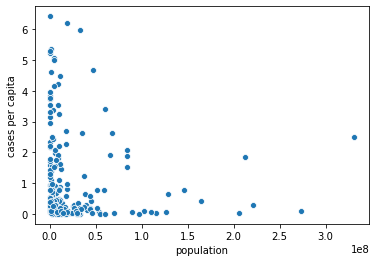

In [5]:
# Objective 1 Hypothesis 1: Correlation between population of country and spread of COVID-19

# Step 1: Find population as a list
population_per_country = df_population_first_case['population']
population_per_country = population_per_country.reset_index() # Reset index of population_per_country


# Step 2: Visualising Data
df_pop_test = pd.DataFrame()
df_pop_test['population'] = population_per_country['population']
df_pop_test['cases per capita'] = cases_per_capita['cases per capita']
df_pop_test = df_pop_test[(np.abs(stats.zscore(df_pop_test)) < 3).all(axis=1)] # Removing outliers

x = df_pop_test['population']
y = df_pop_test['cases per capita']

sns.scatterplot(x = x, y = y)

# Step 3: Regression statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("The predicted model for cases per capita is y =", np.round(intercept,6), "+", slope, "x.")
print("The r_value for this function is", r_value)
print("The r^2_value for this function is", r_value**2)
print("The p_value for this function is", p_value)

The predicted model for cases per capita is y = 0.811958 + 0.001093 x.
The r_value for this function is 0.27420699320366343
The r^2_value for this function is 0.07518947512179393
The p_value for this function is 0.00011390481216269079


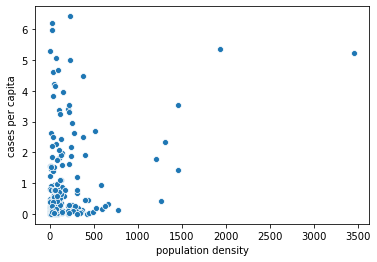

In [6]:
# Objective 1 Hypothesis 2: Correlation between population density and cases per capita


# Step 1: Find population density as a list
population_density_per_country = df_population_first_case['population_density']
population_density_per_country = population_density_per_country.reset_index() # Reset index of population_density_per_country
population_density_per_country = population_density_per_country[population_density_per_country['population_density'].notna()]


# Step 2: Visualising Data
df_pop_den_test = pd.DataFrame()
df_pop_den_test['population density'] = population_density_per_country['population_density']
df_pop_den_test['cases per capita'] = cases_per_capita['cases per capita']
df_pop_den_test = df_pop_den_test[(np.abs(stats.zscore(df_pop_den_test)) < 3).all(axis=1)] # Removing outliers

x = df_pop_den_test['population density']
y = df_pop_den_test['cases per capita']

sns.scatterplot(x = x, y = y)

# Step 3: Regression statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("The predicted model for cases per capita is y =", np.round(intercept,6), "+", np.round(slope,6), "x.")
print("The r_value for this function is", r_value)
print("The r^2_value for this function is", r_value**2)
print("The p_value for this function is", p_value)

The predicted model for cases per capita is y = -0.733487 + 0.055233 x.
The r_value for this function is 0.36280815342499884
The r^2_value for this function is 0.13162975619165748
The p_value for this function is 4.1628781184415815e-07


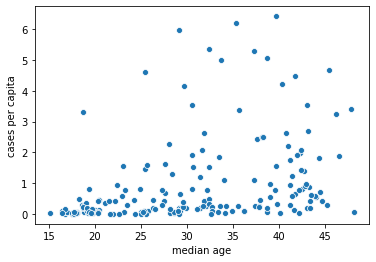

In [7]:
# Objective 1 Hypothesis 3: Correlation between age and cases per capita


# Step 1: Find population density as a list
population_age_per_country = df_population_first_case['median_age']
population_age_per_country = population_age_per_country.reset_index() # Reset index of population_density_per_country
population_age_per_country = population_age_per_country[population_age_per_country['median_age'].notna()]


# Step 2: Visualising Data
df_pop_age_test = pd.DataFrame()
df_pop_age_test['median age'] = population_age_per_country['median_age']
df_pop_age_test['cases per capita'] = cases_per_capita['cases per capita']
df_pop_age_test = df_pop_age_test[(np.abs(stats.zscore(df_pop_age_test)) < 3).all(axis=1)] # Removing outliers

x = df_pop_age_test['median age']
y = df_pop_age_test['cases per capita']

sns.scatterplot(x = x, y = y)

# Step 3: Regression statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("The predicted model for cases per capita is y =", np.round(intercept,6), "+", np.round(slope,6), "x.")

print("The r_value for this function is", r_value)
print("The r^2_value for this function is", r_value**2)
print("The p_value for this function is", p_value)

The predicted model for cases per capita is y = 2.152612 + -0.056595 x.
The r_value for this function is -0.31573790047662403
The r^2_value for this function is 0.09969042179738655
The p_value for this function is 1.8615595435566122e-05


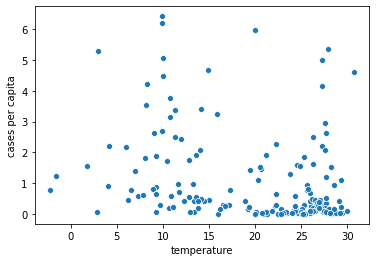

In [8]:
# Objective 3 Hypothesis 1

# Data cleaning for df_temp
df_temp = df_temperature.T # Flip the rows and columns of dataframe
df_temp = df_temp[13] # Keep only the latest year in the dataframe(2013)
df_temp = df_temp.dropna() # Drop any row with no data
df_temp = df_temp.iloc[1:] # Remove year from the database


# Step 1: Combine temperature and cases per capita
df_temp_test = pd.DataFrame({'temperature':df_temp,'cases per capita':cases_per_capita_unindexed})
df_temp_test = df_temp_test.dropna()


# Step 2: Visualising Data
df_temp_test = df_temp_test[(np.abs(stats.zscore(df_temp_test)) < 3).all(axis=1)] # Removing outliers
x = df_temp_test['temperature']
y = df_temp_test['cases per capita']
sns.scatterplot(x = x, y = y)

# Step 3: Regression statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("The predicted model for cases per capita is y =", np.round(intercept,6), "+", np.round(slope,6), "x.")

print("The r_value for this function is", r_value)
print("The r^2_value for this function is", r_value**2)
print("The p_value for this function is", p_value)

The predicted model for cases per capita is y = -1.055498 + 0.03132 x.
The r_value for this function is 0.22301325671127306
The r^2_value for this function is 0.04973491266896818
The p_value for this function is 0.1408758613583152


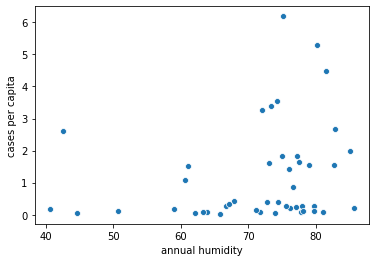

In [9]:
# Objective 3 Hypothesis 2

# Data cleaning for df_humidity
df_humidity = df_humidity.iloc[:7984] # Remove last rows of irrelvant information
df_humidity = df_humidity[['Country or Territory', 'Statistic Description', 'Annual NCDC Computed Value']] # Keep only relevant information
df_humidity = df_humidity[df_humidity['Statistic Description'] == 'Mean Value'] # Keep only means, not maximums or minimums
df_humidity = df_humidity[df_humidity['Annual NCDC Computed Value'] > 0] # Drop any humidity below 0%
df_humidity['Country or Territory'] = df_humidity['Country or Territory'].str.title()
df_humidity = df_humidity.groupby('Country or Territory').mean()


# Step 1: Combine annual humidity and cases per capita
df_hum = df_humidity['Annual NCDC Computed Value']
df_hum_test = pd.DataFrame({'cases per capita':cases_per_capita_unindexed, 'annual humidity':df_hum})
df_hum_test = df_hum_test.dropna()


# Step 2: Visualising Data
df_hum_test = df_hum_test[(np.abs(stats.zscore(df_hum_test)) < 3).all(axis=1)] # Removing outliers
x = df_hum_test['annual humidity']
y = df_hum_test['cases per capita']
sns.scatterplot(x,y)


# Step 3: Regression statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("The predicted model for cases per capita is y =", np.round(intercept,6), "+", np.round(slope,6), "x.")

print("The r_value for this function is", r_value)
print("The r^2_value for this function is", r_value**2)
print("The p_value for this function is", p_value)

The predicted model for cases per capita is y = 1.259772 + -0.000203 x.
The r_value for this function is -0.06482124059714615
The r^2_value for this function is 0.004201793232553108
The p_value for this function is 0.4244660835260088


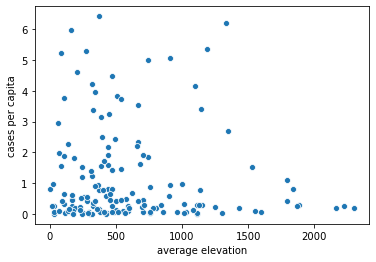

In [10]:
# Objective 3 Hypothesis 3
df_elevation = pd.read_csv("elevation-table-1.csv")


# Data cleaning for df_elevation
df_elevation['Elevation str'] = df_elevation['Elevation'].astype(str) # Cast elevation as a string
df_elevation['Elevation str'] = df_elevation['Elevation str'].str.split("m",1) # Split elevation into two strings at "m"
df_elevation['Elevation str'] = df_elevation['Elevation str'].str[0] # Keep everything before "m"
df_elevation['Elevation str'] = df_elevation['Elevation str'].str.strip() # Remove the space before the "m"
df_elevation['Elevation str'] = df_elevation['Elevation str'].str.replace(",","") # Remove any commas
df_elevation['Elevation'] = df_elevation['Elevation str'].astype(float) # Recast elevation as a float
df_elevation = df_elevation.drop(columns=['Elevation str'])

# Step 1: Combine elevation and cases per capita
df_ele = df_elevation['Elevation']
df_ele_test = pd.DataFrame()
df_ele_test['average elevation'] = df_ele
df_ele_test['cases per capita'] = cases_per_capita['cases per capita']


# Step 2: Visualising data
df_ele_test = df_ele_test[(np.abs(stats.zscore(df_ele_test)) < 3).all(axis=1)] # Removing outliers
x = df_ele_test['average elevation']
y = df_ele_test['cases per capita']
sns.scatterplot(x,y)

# Step 3: Regression statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("The predicted model for cases per capita is y =", np.round(intercept,6), "+", np.round(slope,6), "x.")
print("The r_value for this function is", r_value)
print("The r^2_value for this function is", r_value**2)
print("The p_value for this function is", p_value)


The predicted model for cases per capita is y = 1.559272 + -0.005873 x.
The r_value for this function is -0.143901730274962
The r^2_value for this function is 0.020707707976127917
The p_value for this function is 0.5228886120188172


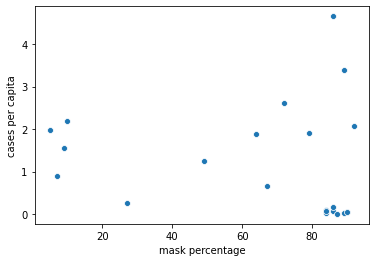

In [11]:
# Objective 2 Hypothesis 1

# Step 1: Manipulating Dataframe
df_mask['DateTime'] = pd.to_datetime(df_mask['DateTime'])
df_mask = df_mask.T # Transpose dataframe so that the each country is a row
three_months_avg = df_population_three_months['date'].mean() # Find average date of three months after infection
df_mask = df_mask[df_mask.columns[df_mask.loc['DateTime']<three_months_avg]] # Only keep rows after average date
df_mask['max'] = df_mask.max(axis = 'columns') # New column that has the highest % recorded in the timeframe
df_mask.drop(df_mask.head(1).index, inplace = True) # Drop first row(which is not data)
df_mask['three months'] = df_population_three_months['date'] # Create new row using data from df_population
df_mask.dropna(subset=['three months'], inplace = True) # Drop rows where df_population does not have data for it(because there are no cases for those countries either)

# Step 2: Combining Data
df_mask_test = pd.DataFrame()
df_mask_test['mask percentage'] = df_mask['max']
df_mask_test['cases per capita'] = cases_per_capita_unindexed
df_mask_test['mask percentage'] = df_mask_test['mask percentage'].astype(float) # Convert to float because int cannot be graphed


# Step 3: Visualising Data
df_mask_test = df_mask_test[(np.abs(stats.zscore(df_mask_test)) < 3).all(axis=1)] # Removing outliers
x = df_mask_test['mask percentage']
y = df_mask_test['cases per capita']
sns.scatterplot(x,y)

# Step 4: Regression statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("The predicted model for cases per capita is y =", np.round(intercept,6), "+", np.round(slope,6), "x.")
print("The r_value for this function is", r_value)
print("The r^2_value for this function is", r_value**2)
print("The p_value for this function is", p_value)

The predicted model for cases per capita is y = 1.836375 + -0.014039 x.
The r_value for this function is -0.15920339012780998
The r^2_value for this function is 0.025345719428187665
The p_value for this function is 0.4791467909743803


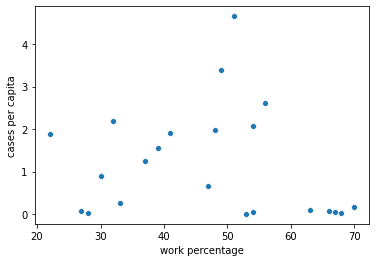

In [12]:
# Objective 2 Hypothesis 2
df_work['DateTime'] = pd.to_datetime(df_work['DateTime'])
df_work = df_work.T # Transpose dataframe so that the each country is a row
three_months_avg = df_population_three_months['date'].mean() # Find average date of three months after infection
df_work = df_work[df_work.columns[df_work.loc['DateTime']<three_months_avg]] # Only keep rows after average date
df_work['max'] = df_work.max(axis = 'columns') # New column that has the highest % recorded in the timeframe
df_work.drop(df_work.head(1).index, inplace = True) # Drop first row(which is not data)
df_work['three months'] = df_population_three_months['date'] # Create new row using data from df_population
df_work.dropna(subset=['three months'], inplace = True) # Drop rows where df_population does not have data for it(because there are no cases for those countries either)

# Step 2: Combining Data
df_work_test = pd.DataFrame()
df_work_test['work percentage'] = df_work['max']
df_work_test['cases per capita'] = cases_per_capita_unindexed
df_work_test['work percentage'] = df_work_test['work percentage'].astype(float) # Convert to float because int cannot be graphed

# Step 3: Visualising Data
df_work_test = df_work_test[(np.abs(stats.zscore(df_work_test)) < 3).all(axis=1)] # Removing outliers
x = df_work_test['work percentage']
y = df_work_test['cases per capita']
sns.scatterplot(x,y)

# Step 4: Regression statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("The predicted model for cases per capita is y =", np.round(intercept,6), "+", np.round(slope,6), "x.")
print("The r_value for this function is", r_value)
print("The r^2_value for this function is", r_value**2)
print("The p_value for this function is", p_value)

The predicted model for cases per capita is y = 0.91567 + 0.003146 x.
The r_value for this function is 0.010801709557840839
The r^2_value for this function is 0.00011667692937195013
The p_value for this function is 0.9619487324338837


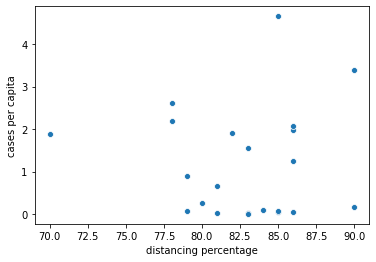

In [13]:
# Objective 2 Hypothesis 3
df_distance['DateTime'] = pd.to_datetime(df_distance['DateTime'])
df_distance = df_distance.T # Transpose dataframe so that the each country is a row
three_months_avg = df_population_three_months['date'].mean() # Find average date of three months after infection
df_distance = df_distance[df_distance.columns[df_distance.loc['DateTime']<three_months_avg]] # Only keep rows after average date
df_distance['max'] = df_distance.max(axis = 'columns') # New column that has the highest % recorded in the timeframe
df_distance.drop(df_distance.head(1).index, inplace = True) # Drop first row(which is not data)
df_distance['three months'] = df_population_three_months['date'] # Create new row using data from df_population
df_distance.dropna(subset=['three months'], inplace = True) # Drop rows where df_population does not have data for it(because there are no cases for those countries either)

# Step 2: Combining Data
df_distance_test = pd.DataFrame()
df_distance_test['distancing percentage'] = df_distance['max']
df_distance_test['cases per capita'] = cases_per_capita_unindexed
df_distance_test['distancing percentage'] = df_distance_test['distancing percentage'].astype(float) # Convert to float because int cannot be graphed

# Step 3: Visualising Data
df_distance_test = df_distance_test[(np.abs(stats.zscore(df_distance_test)) < 3).all(axis=1)] # Removing outliers
x = df_distance_test['distancing percentage']
y = df_distance_test['cases per capita']
sns.scatterplot(x,y)

# Step 4: Regression statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("The predicted model for cases per capita is y =", np.round(intercept,6), "+", np.round(slope,6), "x.")
print("The r_value for this function is", r_value)
print("The r^2_value for this function is", r_value**2)
print("The p_value for this function is", p_value)

The predicted model for cases per capita is y = 0.327725 + 53481.741817 x.
The r_value for this function is 0.49019857104093717
The r^2_value for this function is 0.2402946390505767
The p_value for this function is 0.00010855800488887843


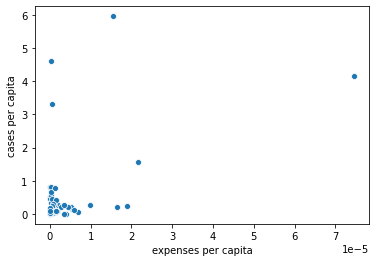

In [62]:
# Objective 2 Hypothesis 4
df_expenditure = pd.read_excel('NHA indicators.xlsx')

# Step 1: Manipulating Dataframe
df_expenditure.drop(columns=['Indicators','Unnamed: 2'], inplace = True) # Drop irrelvant columns
df_expenditure.drop(0, inplace = True) # Drop first row which is also irrelevant
df_expenditure = df_expenditure.groupby('Countries').sum() # Add private and public spending together
df_expenditure.replace(0, np.NaN) # Replace zeroes with NaN for easier calcuation
df_expenditure['avg'] = df_expenditure.iloc[:,1:20].mean(axis=1) # Create new colun
df_expenditure['pop'] = df_population_three_months['population'] # Population
df_expenditure.dropna(subset=['pop'], inplace = True) # Drop any row with na population
df_expenditure['expenses per capita'] = df_expenditure['avg']/df_expenditure['pop']

# Step 2: Combining Data
df_exp_test = pd.DataFrame()
df_exp_test['expenses per capita'] = df_expenditure['expenses per capita']
df_exp_test['cases per capita'] = cases_per_capita_unindexed

# Step 3: Visualising Data
df_exp_test = df_exp_test[(np.abs(stats.zscore(df_exp_test)) < 3).all(axis=1)] # Removing outliers
x = df_exp_test['expenses per capita']
y = df_exp_test['cases per capita']
sns.scatterplot(x,y)

# Step 4: Regression statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("The predicted model for cases per capita is y =", np.round(intercept,6), "+", np.round(slope,6), "x.")
print("The r_value for this function is", r_value)
print("The r^2_value for this function is", r_value**2)
print("The p_value for this function is", p_value)